In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('./pizza_sales_excel_file.xlsx')

In [3]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [4]:
df.shape

(48620, 12)

## KPIs

In [7]:
TotalRevenue=df['total_price'].sum()
TotalRevenue

817860.05

In [8]:
TotalPizzasSold=df['quantity'].sum()
TotalPizzasSold

49574

In [9]:
TotalOrders=df['order_id'].nunique()
TotalOrders

21350

In [10]:
AvgPizzaPerOrder=TotalPizzasSold/TotalOrders
AvgPizzaPerOrder

2.321967213114754

In [11]:
AvgOrderValue=TotalRevenue/TotalOrders
AvgOrderValue

38.30726229508197

## Analysis and Visualization

In [12]:
TotalRevenueByCategory=df.groupby(['pizza_category'], as_index=False)['total_price'].sum().sort_values(by='total_price', ascending=False)
TotalRevenueByCategory

,pizza_category,total_price
1,Classic,220053.10
2,Supreme,208197.00
0,Chicken,195919.50
3,Veggie,193690.45


In [13]:
TotalRevenueBySize=df.groupby(['pizza_size'], as_index=False)['total_price'].sum().sort_values(by='total_price', ascending=False)
TotalRevenueBySize

,pizza_size,total_price
0,L,375318.70
1,M,249382.25
2,S,178076.50
3,XL,14076.00
4,XXL,1006.60


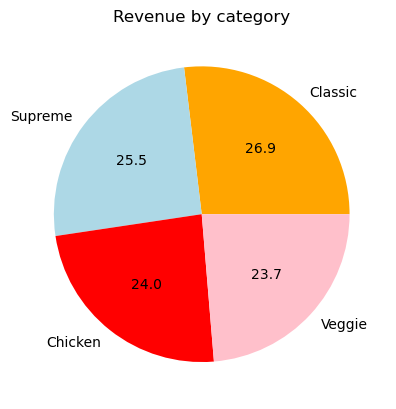

In [14]:
labels=['Classic', 'Supreme', 'Chicken', 'Veggie']
plt.pie(TotalRevenueByCategory['total_price'], autopct='%1.1f', labels=labels, colors=['orange', 'lightblue', 'red', 'pink'])
plt.title("Revenue by category")
plt.show()

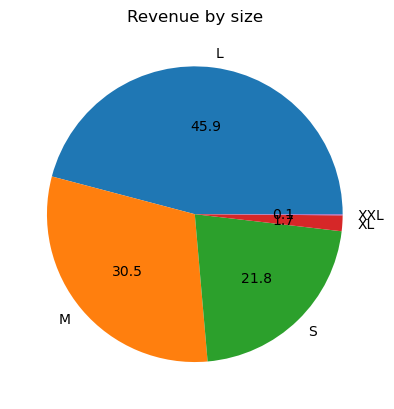

In [15]:
labels=['L', 'M', 'S', 'XL', 'XXL']
plt.pie(TotalRevenueBySize['total_price'], autopct='%1.1f', labels=labels)
plt.title("Revenue by size")
plt.show()

In [16]:
TotalPizzasSoldBySize=df.groupby(['pizza_size'], as_index=False)['quantity'].sum().sort_values(by='quantity', ascending=False)
TotalPizzasSoldBySize

,pizza_size,quantity
0,L,18956
1,M,15635
2,S,14403
3,XL,552
4,XXL,28


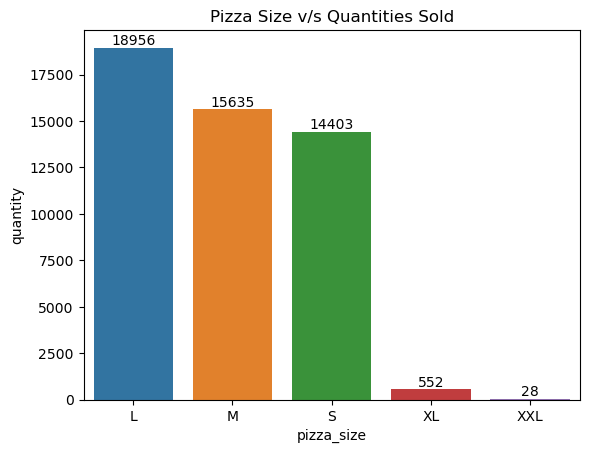

In [17]:
ax=sns.barplot(x='pizza_size', y='quantity', data=TotalPizzasSoldBySize)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Pizza Size v/s Quantities Sold")
plt.show()

In [18]:
TotalPizzasSoldByCategory=df.groupby(['pizza_category'], as_index=False)['quantity'].sum().sort_values(by='quantity', ascending=False)
TotalPizzasSoldByCategory

,pizza_category,quantity
1,Classic,14888
2,Supreme,11987
3,Veggie,11649
0,Chicken,11050


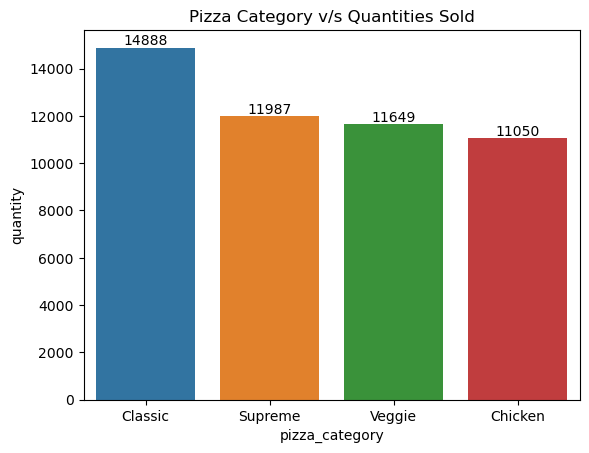

In [19]:
ax=sns.barplot(x='pizza_category', y='quantity', data=TotalPizzasSoldByCategory)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Pizza Category v/s Quantities Sold")
plt.show()

In [20]:
df.sample(5)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
39573,39574,17426,big_meat_s,1,2015-10-23,17:46:26,12.00,12.00,S,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau...",The Big Meat Pizza
514,515,220,napolitana_l,1,2015-01-04,15:31:59,20.50,20.50,L,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
38828,38829,17112,the_greek_xl,2,2015-10-17,12:56:31,25.50,51.00,XL,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",The Greek Pizza
13403,13404,5880,southw_ckn_s,1,2015-04-09,14:31:22,12.75,12.75,S,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja...",The Southwest Chicken Pizza
7294,7295,3215,pepperoni_l,1,2015-02-23,18:48:26,15.25,15.25,L,Classic,"Mozzarella Cheese, Pepperoni",The Pepperoni Pizza


In [21]:
type(df['order_date'])

pandas.core.series.Series

## Adding a column for month for further analysis

In [22]:
df['month']=df['order_date'].dt.month

In [23]:
df.sample(5)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,month
20514,20515,9009,big_meat_s,1,2015-05-31,19:34:02,12.00,12.00,S,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau...",The Big Meat Pizza,5
6109,6110,2708,prsc_argla_s,1,2015-02-14,19:40:04,12.50,12.50,S,Supreme,"Prosciutto di San Daniele, Arugula, Mozzarella...",The Prosciutto and Arugula Pizza,2
32231,32232,14242,southw_ckn_l,1,2015-08-26,13:59:25,20.75,20.75,L,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja...",The Southwest Chicken Pizza,8
7817,7818,3437,southw_ckn_l,1,2015-02-27,17:15:48,20.75,20.75,L,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja...",The Southwest Chicken Pizza,2
34349,34350,15161,spinach_fet_l,1,2015-09-11,12:36:47,20.25,20.25,L,Veggie,"Spinach, Mushrooms, Red Onions, Feta Cheese, G...",The Spinach and Feta Pizza,9


In [24]:
TotalOrdersByMonth=df.groupby(['month'], as_index=False)['order_id'].nunique().sort_values(by='month', ascending=False)
TotalOrdersByMonth

,month,order_id
11,12,1680
10,11,1792
9,10,1646
8,9,1661
7,8,1841
6,7,1935
5,6,1773
4,5,1853
3,4,1799
2,3,1840


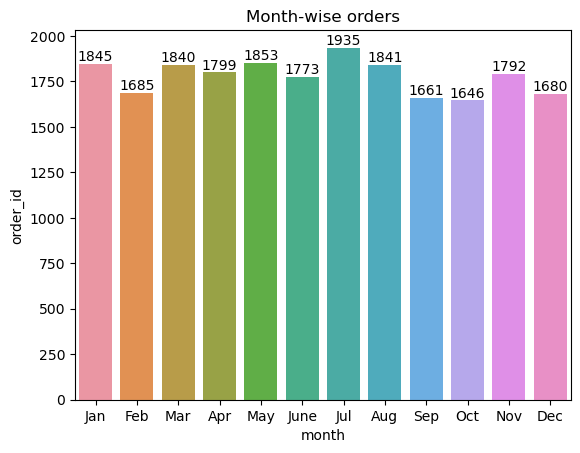

In [25]:
ax=sns.barplot(x='month', y='order_id', data=TotalOrdersByMonth)
for bars in ax.containers:
    ax.bar_label(bars)
ax.set(xticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title("Month-wise orders")
plt.show()

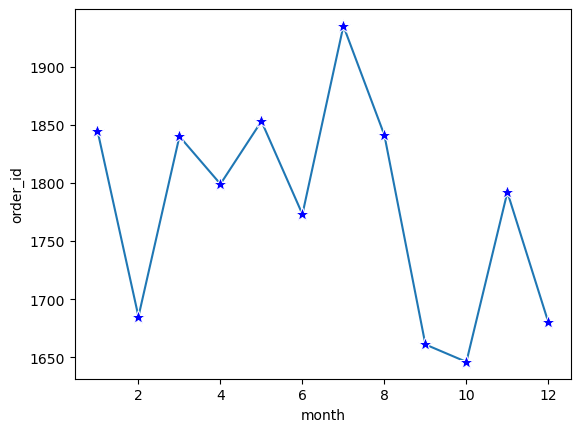

In [26]:
ax=sns.lineplot(x='month', y='order_id', data=TotalOrdersByMonth, marker='*', markerfacecolor='blue', markersize=10)
plt.show()

In [27]:
Top5PizzaByRevenue=df.groupby(['pizza_name'], as_index=False)['total_price'].sum().sort_values(by='total_price', ascending=False).head(5)
Top5PizzaByRevenue

,pizza_name,total_price
30,The Thai Chicken Pizza,43434.25
0,The Barbecue Chicken Pizza,42768.00
4,The California Chicken Pizza,41409.50
7,The Classic Deluxe Pizza,38180.50
26,The Spicy Italian Pizza,34831.25


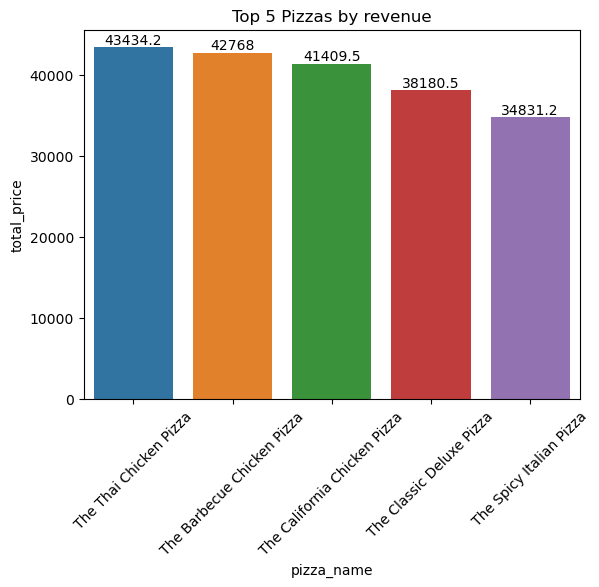

In [28]:
ax=sns.barplot(x='pizza_name', y='total_price', data=Top5PizzaByRevenue)
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation=45)
plt.title("Top 5 Pizzas by revenue")
plt.show()

In [29]:
Bottom5PizzaByRevenue=df.groupby(['pizza_name'], as_index=False)['total_price'].sum().sort_values(by='total_price', ascending=True).head(5)
Bottom5PizzaByRevenue

,pizza_name,total_price
2,The Brie Carre Pizza,11588.50
11,The Green Garden Pizza,13955.75
28,The Spinach Supreme Pizza,15277.75
16,The Mediterranean Pizza,15360.50
27,The Spinach Pesto Pizza,15596.00


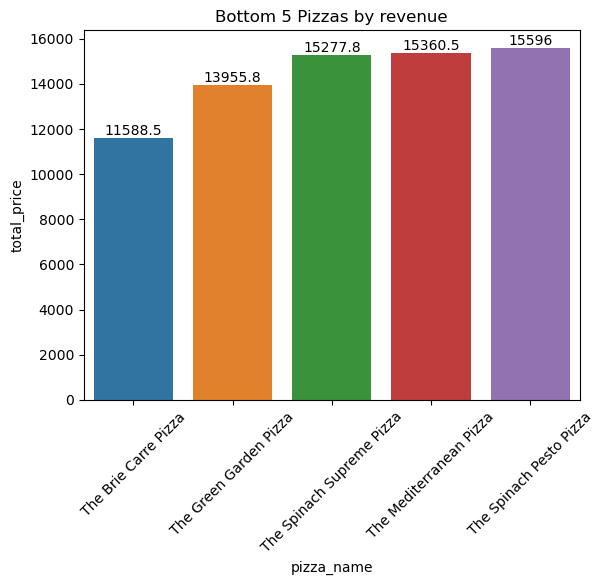

In [30]:
ax=sns.barplot(x='pizza_name', y='total_price', data=Bottom5PizzaByRevenue)
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation=45)
plt.title("Bottom 5 Pizzas by revenue")
plt.show()

In [31]:
Top5PizzaByQuantity=df.groupby(['pizza_name'], as_index=False)['quantity'].sum().sort_values(by='quantity', ascending=False).head(5)
Top5PizzaByQuantity

,pizza_name,quantity
7,The Classic Deluxe Pizza,2453
0,The Barbecue Chicken Pizza,2432
12,The Hawaiian Pizza,2422
20,The Pepperoni Pizza,2418
30,The Thai Chicken Pizza,2371


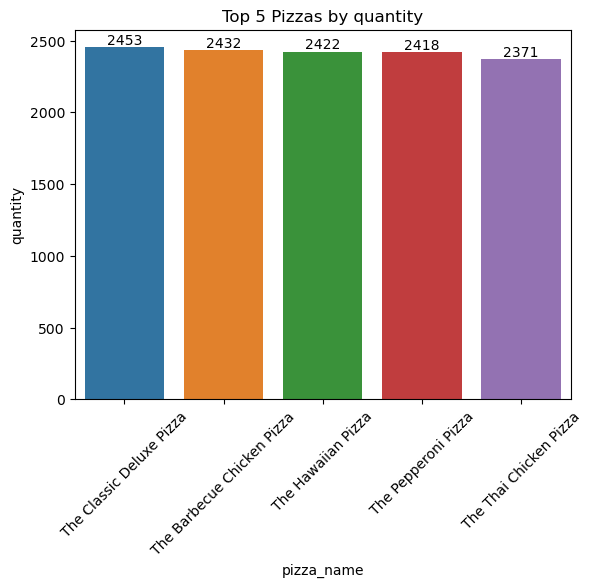

In [32]:
ax=sns.barplot(x='pizza_name', y='quantity', data=Top5PizzaByQuantity)
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation=45)
plt.title("Top 5 Pizzas by quantity")
plt.show()

In [33]:
Bottom5PizzaByQuantity=df.groupby(['pizza_name'], as_index=False)['quantity'].sum().sort_values(by='quantity', ascending=True).head(5)
Bottom5PizzaByQuantity

,pizza_name,quantity
2,The Brie Carre Pizza,490
16,The Mediterranean Pizza,934
3,The Calabrese Pizza,937
28,The Spinach Supreme Pizza,950
24,The Soppressata Pizza,961


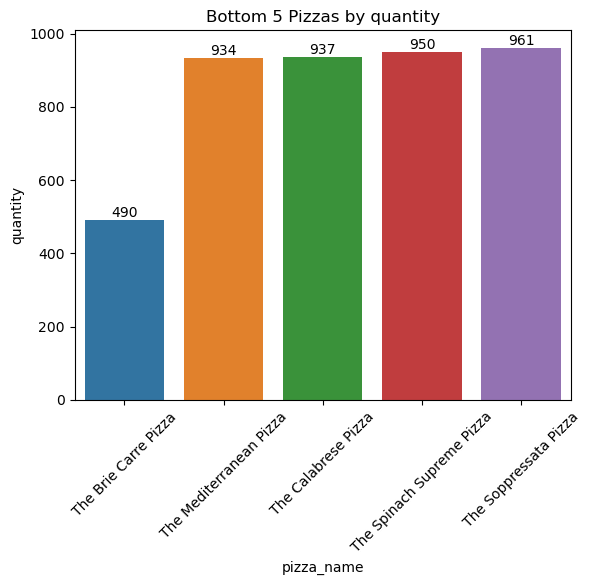

In [34]:
ax=sns.barplot(x='pizza_name', y='quantity', data=Bottom5PizzaByQuantity)
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation=45)
plt.title("Bottom 5 Pizzas by quantity")
plt.show()